In [1]:
import pandas as pd
import torch
import torch.nn as nn
from tqdm.notebook import tqdm, trange
import seaborn as sns

In [2]:
df = pd.read_csv('../data/sp500/csv/AAPL.csv', parse_dates=['Date'], date_format='%d-%m-%Y')
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
...,...,...,...,...,...,...,...
10585,2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
10586,2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
10587,2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994
10588,2022-12-09,140.899994,142.339996,76069500,145.570007,142.160004,142.160004


In [3]:
LEARNING_RATE = 0.01
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# BATCH_SIZE = 6
NUM_EPOCHS = 64

In [4]:
DEVICE

'cuda'

In [5]:
X = torch.tensor([[x] for x in df['Close'][1:].values], dtype=torch.float32, device=DEVICE)
X

tensor([[1.2165e-01],
        [1.1272e-01],
        [1.1551e-01],
        ...,
        [1.4265e+02],
        [1.4216e+02],
        [1.4224e+02]], device='cuda:0')

In [6]:
y = torch.tensor([[x] for x in df['Close'][:-1]], dtype=torch.float32, device=DEVICE)
y

tensor([[1.2835e-01],
        [1.2165e-01],
        [1.1272e-01],
        ...,
        [1.4094e+02],
        [1.4265e+02],
        [1.4216e+02]], device='cuda:0')

In [28]:
model = nn.RNN(input_size=1, hidden_size=1, nonlinearity='relu')
criterion = nn.MSELoss()

model.to(DEVICE)
criterion.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(),lr=LEARNING_RATE)

In [8]:
X.shape

torch.Size([10589, 1])

In [9]:
model(X)[0].cpu()

tensor([[-0.6036],
        [-0.7884],
        [-0.8269],
        ...,
        [ 1.0000],
        [ 1.0000],
        [ 1.0000]], grad_fn=<ToCopyBackward0>)

<Axes: >

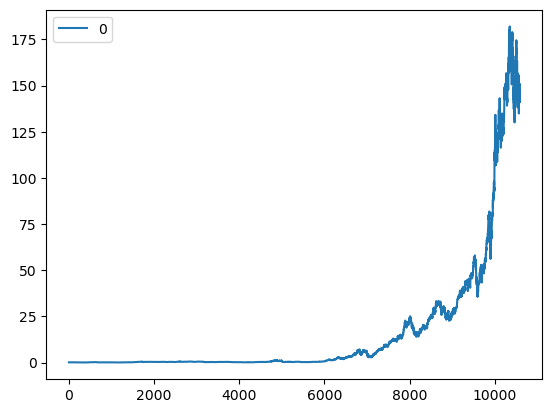

In [29]:
sns.lineplot(X.cpu().detach())

<Axes: >

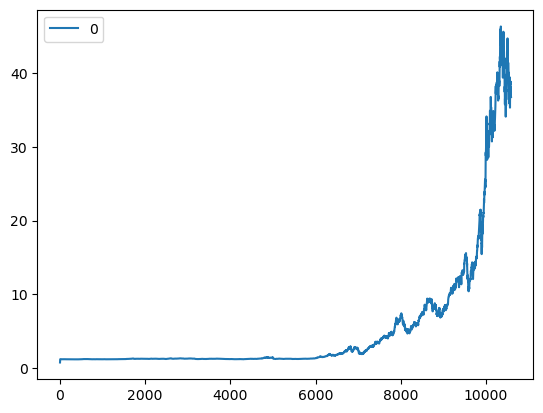

In [30]:
sns.lineplot(model(X)[0].cpu().detach(), color='red')

In [25]:
for epoch in tqdm(range(NUM_EPOCHS)):
     
    input = X
    target = y 
    output, _ = model(input)

    loss = criterion(output, target)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()    

  0%|          | 0/64 [00:00<?, ?it/s]

<Axes: >

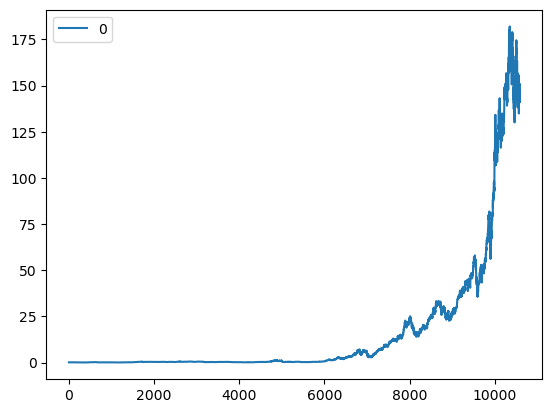

In [26]:
sns.lineplot(X.cpu().detach())

<Axes: >

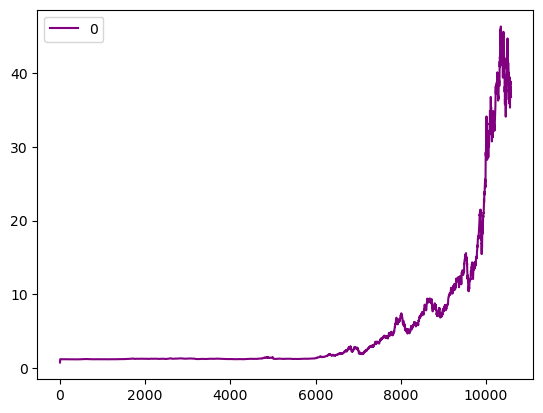

In [35]:
sns.lineplot(model(X)[0].cpu().detach(), palette=['purple'])